In [105]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

 """
 Sex : male   : 1
       female : 0
       
 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

trestbps: resting blood pressure (in mm Hg on admission to the hospital

chol: serum cholestoral in mg/dl

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest. 

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

ca: number of major vessels (0-3) colored by flourosopy


thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

Target : 0 no heart disease
         1 heart disease
"""

In [106]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [107]:
df.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholestoral',
              'fasting_blood_sugar','rest_ecg','Max_heart_rate','exercise_induced_angina',
              'oldpeak','slope','vessels_colored_by_flourosopy','thalassemia','target']

In [108]:
Categorical_features = ['sex','chest_pain_type','fasting_blood_sugar',
                        'rest_ecg','exercise_induced_angina','slope',
                        'vessels_colored_by_flourosopy','thalassemia']

In [109]:
Numerical_features = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']

In [110]:
df[Categorical_features] = df[Categorical_features].astype('object')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [112]:
df['sex'][df['sex'] == 0] = 'Female'
df['sex'][df['sex'] == 1] = 'Male'

df['chest_pain_type'][df['chest_pain_type'] == 0] = 'Typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'Atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'Non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'Asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'Lower than 120 mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'Greater than 120 mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'Normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'No'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'Yes'

df['slope'][df['slope'] == 0] = 'Upsloping'
df['slope'][df['slope'] == 1] = 'Flat'
df['slope'][df['slope'] == 2] = 'Downsloping'

df['vessels_colored_by_flourosopy'][df['vessels_colored_by_flourosopy'] == 0] = 'Zero'
df['vessels_colored_by_flourosopy'][df['vessels_colored_by_flourosopy'] == 1] = 'One'
df['vessels_colored_by_flourosopy'][df['vessels_colored_by_flourosopy'] == 2] = 'Two'
df['vessels_colored_by_flourosopy'][df['vessels_colored_by_flourosopy'] == 3] = 'Three'
df['vessels_colored_by_flourosopy'][df['vessels_colored_by_flourosopy'] == 4] = 'Four'

df['thalassemia'][df['thalassemia'] == 0] = 'No'
df['thalassemia'][df['thalassemia'] == 1] = 'Normal'
df['thalassemia'][df['thalassemia'] == 2] = 'Fixed Defect'
df['thalassemia'][df['thalassemia'] == 3] = 'Reversable Defect'


<ipython-input-112-83812eaba148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'Female'
<ipython-input-112-83812eaba148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 1] = 'Male'
<ipython-input-112-83812eaba148>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type'] == 0] = 'Typical angina'
<ipython-input-112-83812eaba148>:5: SettingWithCopyW

In [113]:
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

<AxesSubplot:xlabel='target', ylabel='count'>

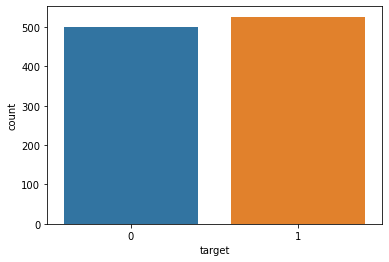

In [115]:
# Lets check the whether data set is balanced or not !
sns.countplot(data=df,x='target')
# Conclusion Balanced

In [116]:
# Checking whether age is normally distributed or not

<AxesSubplot:xlabel='age', ylabel='Count'>

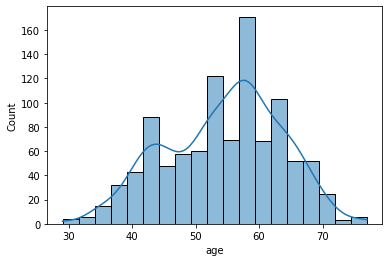

In [117]:
sns.histplot(data=df,x='age',kde=True)

In [118]:
stat , Pvalue = stats.shapiro(df['age'])
if Pvalue > 0.05:
    print("Normally distributed")
else:
    print("Not a normal distribution")

Not a normal distribution


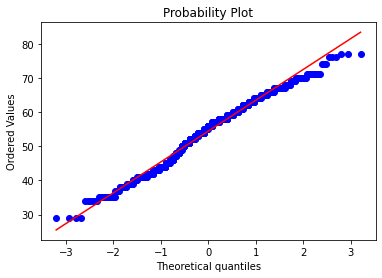

In [119]:
stats.probplot(df['age'],dist="norm", plot=plt)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

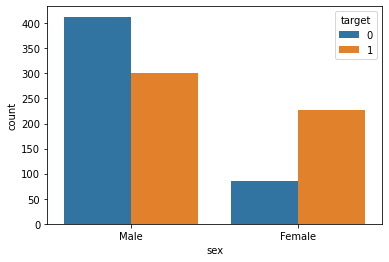

In [120]:
sns.countplot(data=df,x='sex',hue='target')

In [121]:
contigency_data = pd.crosstab(df['sex'],df['target'])

stat,pvalue,dof,exp =stats.chi2_contingency(contigency_data)

print('stat=%.3f, p=%.3f' % (stat, pvalue))
if pvalue > 0.05:
    print('Same distribution no effect of sex on heart disease')
else:
    print('There is a effect of sex on heart disease')
    

stat=78.863, p=0.000
There is a effect of sex on heart disease


<AxesSubplot:xlabel='age', ylabel='resting_blood_pressure'>

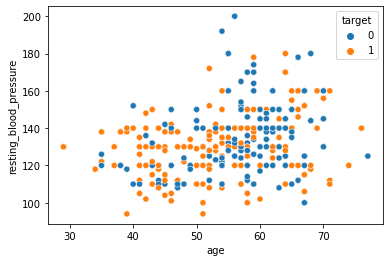

In [122]:
sns.scatterplot(data=df,y='resting_blood_pressure',x='age',hue='target')

In [123]:
df.corr(method='spearman')['age']['resting_blood_pressure']

0.2801886637751333

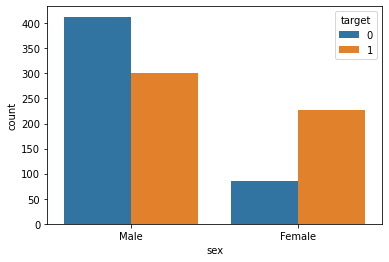

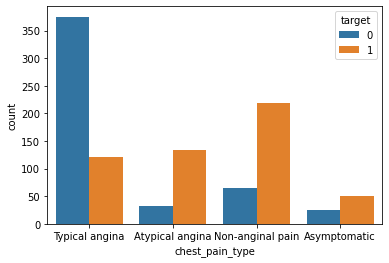

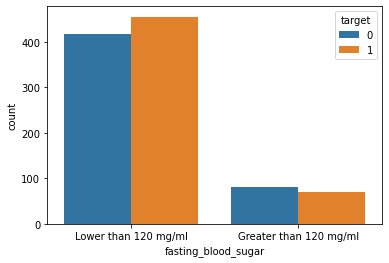

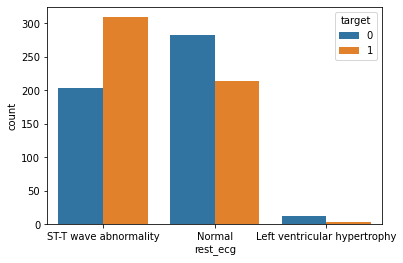

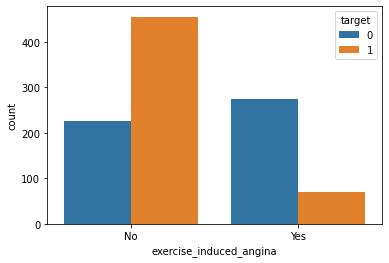

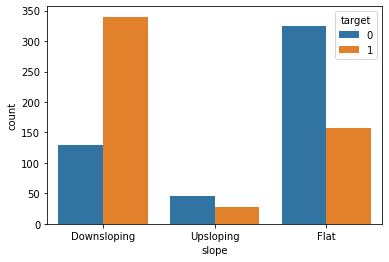

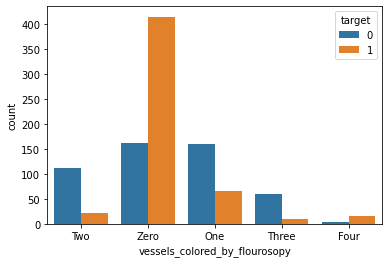

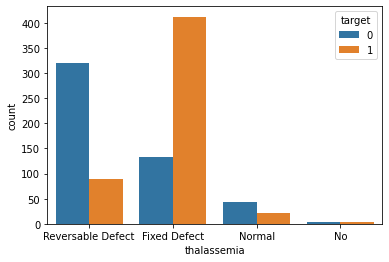

In [124]:
for i in Categorical_features:
    sns.countplot(data=df,x=i,hue='target')
    plt.show()
    
# In sex female had more heart disease than male 
# Cheast pain : if no pain means more likely no heart disease but still some had 
# fasting blood sugar both same same heart disease 
# if rest ecg 1 then more likely to have heart disease
# if any one had angina without excersice then they more likely had heart disease
# downslope = highly likely to have heart disease
# 0 colour means highly likely to have heart disease

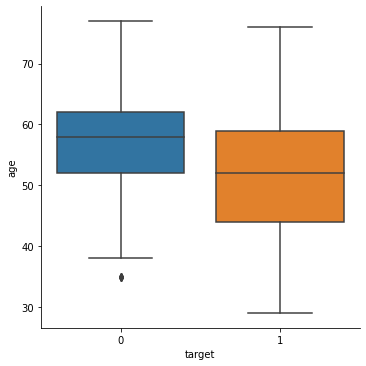

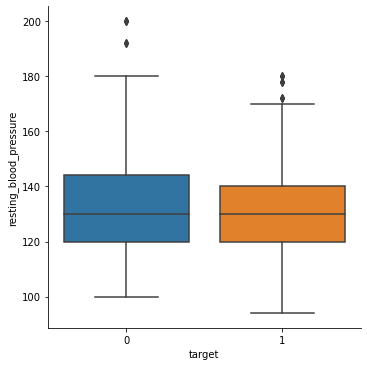

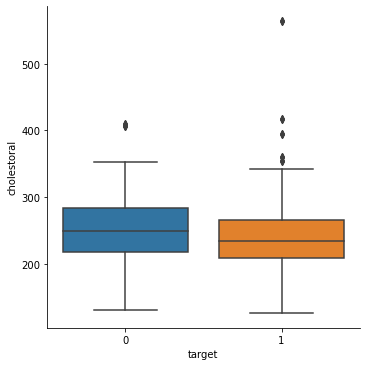

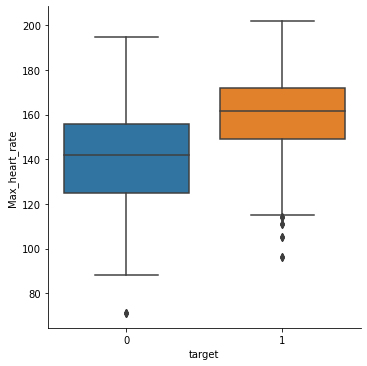

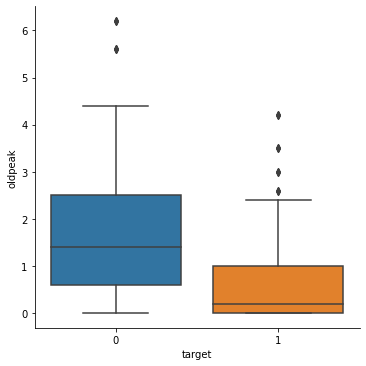

In [125]:
for i in Numerical_features:
    sns.catplot(data=df,x='target',y=i,kind='box')

In [126]:
df = pd.get_dummies(df,drop_first=True)

In [127]:
df.columns

Index(['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate',
       'oldpeak', 'target', 'sex_Male', 'chest_pain_type_Atypical angina',
       'chest_pain_type_Non-anginal pain', 'chest_pain_type_Typical angina',
       'fasting_blood_sugar_Lower than 120 mg/ml', 'rest_ecg_Normal',
       'rest_ecg_ST-T wave abnormality', 'exercise_induced_angina_Yes',
       'slope_Flat', 'slope_Upsloping', 'vessels_colored_by_flourosopy_One',
       'vessels_colored_by_flourosopy_Three',
       'vessels_colored_by_flourosopy_Two',
       'vessels_colored_by_flourosopy_Zero', 'thalassemia_No',
       'thalassemia_Normal', 'thalassemia_Reversable Defect'],
      dtype='object')

In [128]:
df.to_csv('Converted_data_set',index=False)